In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [15]:
data = yf.download("AAPL MSFT GOOGL", start="2010-01-01", end="2020-01-01")


[*********************100%%**********************]  3 of 3 completed


In [16]:
data

Price       Adj Close                             Close             \
Ticker           AAPL      GOOGL        MSFT       AAPL      GOOGL   
Date                                                                 
2010-01-04   6.461977  15.684434   23.431583   7.643214  15.684434   
2010-01-05   6.473149  15.615365   23.439161   7.656429  15.615365   
2010-01-06   6.370183  15.221722   23.295317   7.534643  15.221722   
2010-01-07   6.358407  14.867367   23.053049   7.520714  14.867367   
2010-01-08   6.400681  15.065566   23.212038   7.570714  15.065566   
...               ...        ...         ...        ...        ...   
2019-12-24  69.054337  67.221497  151.377396  71.067497  67.221497   
2019-12-26  70.424385  68.123497  152.618195  72.477501  68.123497   
2019-12-27  70.397675  67.732002  152.897171  72.449997  67.732002   
2019-12-30  70.815483  66.985497  151.579407  72.879997  66.985497   
2019-12-31  71.332909  66.969498  151.685181  73.412498  66.969498   

Price                        High                               Low  \
Ticker            MSFT       AAPL      GOOGL        MSFT       AAPL   
Date                                                                  
2010-01-04   30.950001   7.660714  15.753504   31.100000   7.585000   
2010-01-05   30.959999   7.699643  15.711712   31.100000   7.616071   
2010-01-06   30.770000   7.686786  15.662162   31.080000   7.526786   
2010-01-07   30.450001   7.571429  15.265265   30.700001   7.466071   
2010-01-08   30.660000   7.571429  15.096346   30.879999   7.466429   
...                ...        ...        ...         ...        ...   
2019-12-24  157.380005  71.222504  67.600502  157.710007  70.730003   
2019-12-26  158.669998  72.495003  68.160004  158.729996  71.175003   
2019-12-27  158.960007  73.492500  68.352501  159.550003  72.029999   
2019-12-30  157.589996  73.172501  67.849998  159.020004  71.305000   
2019-12-31  157.699997  73.419998  67.032997  157.770004  72.379997   

Price                                   Open                         \
Ticker          GOOGL        MSFT       AAPL      GOOGL        MSFT   
Date                                                                  
2010-01-04  15.621622   30.590000   7.622500  15.689439   30.620001   
2010-01-05  15.554054   30.639999   7.664286  15.695195   30.850000   
2010-01-06  15.174174   30.520000   7.656429  15.662162   30.879999   
2010-01-07  14.831081   30.190001   7.562500  15.250250   30.629999   
2010-01-08  14.742492   30.240000   7.510714  14.814815   30.280001   
...               ...         ...        ...        ...         ...   
2019-12-24  67.208504  157.119995  71.172501  67.510498  157.479996   
2019-12-26  67.275497  157.399994  71.205002  67.327499  157.559998   
2019-12-27  67.650002  158.220001  72.779999  68.199997  159.449997   
2019-12-30  66.891998  156.729996  72.364998  67.840500  158.990005   
2019-12-31  66.606499  156.449997  72.482498  66.789497  156.770004   

Price          Volume                       
Ticker           AAPL      GOOGL      MSFT  
Date                                        
2010-01-04  493729600   78169752  38409100  
2010-01-05  601904800  120067812  49749600  
2010-01-06  552160000  158988852  58182400  
2010-01-07  477131200  256315428  50559700  
2010-01-08  447610800  188783028  51197400  
...               ...        ...       ...  
2019-12-24   48478800   13468000   8989200  
2019-12-26   93121200   23662000  14520600  
2019-12-27  146266000   23212000  18412800  
2019-12-30  144114400   19994000  16348400  
2019-12-31  100805600   19514000  18369400  

[2516 rows x 18 columns]

In [28]:
returns = data['Adj Close'].pct_change()
returns
returns.dropna()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2010-01-05,0.001729,-0.004404,0.000323
2010-01-06,-0.015907,-0.025209,-0.006137
2010-01-07,-0.001849,-0.023280,-0.010400
2010-01-08,0.006649,0.013331,0.006897
2010-01-11,-0.008822,-0.001512,-0.012720
...,...,...,...
2019-12-24,0.000951,-0.004591,-0.000191
2019-12-26,0.019840,0.013418,0.008197
2019-12-27,-0.000379,-0.005747,0.001828


In [36]:
momentum = returns.rolling(window=120).apply(lambda x: np.prod(1 + x) - 1).shift(1)
momentum
momentum.dropna()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2010-06-28,0.246203,-0.245824,-0.200132
2010-06-29,0.251516,-0.243449,-0.207562
2010-06-30,0.214249,-0.253181,-0.235467
2010-07-01,0.194463,-0.251052,-0.237376
2010-07-02,0.172187,-0.269974,-0.237662
...,...,...,...
2019-12-24,0.398830,0.202709,0.152856
2019-12-26,0.401394,0.186956,0.156000
2019-12-27,0.459280,0.219988,0.166326


In [38]:
ranked = momentum.rank(axis=1, method='first')
ranked
ranked.dropna()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2010-06-28,3.0,1.0,2.0
2010-06-29,3.0,1.0,2.0
2010-06-30,3.0,1.0,2.0
2010-07-01,3.0,1.0,2.0
2010-07-02,3.0,1.0,2.0
...,...,...,...
2019-12-24,3.0,2.0,1.0
2019-12-26,3.0,2.0,1.0
2019-12-27,3.0,2.0,1.0


In [42]:
top_decile = ranked[ranked >= 0]
top_decile.dropna()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2010-06-28,3.0,1.0,2.0
2010-06-29,3.0,1.0,2.0
2010-06-30,3.0,1.0,2.0
2010-07-01,3.0,1.0,2.0
2010-07-02,3.0,1.0,2.0
...,...,...,...
2019-12-24,3.0,2.0,1.0
2019-12-26,3.0,2.0,1.0
2019-12-27,3.0,2.0,1.0


In [47]:
portfolio_returns = (top_decile.notna() * returns).mean(axis=1)
portfolio_returns.dropna()

portfolio_returns

Date
2010-01-04         NaN
2010-01-05    0.000000
2010-01-06    0.000000
2010-01-07    0.000000
2010-01-08    0.000000
                ...   
2019-12-24   -0.001277
2019-12-26    0.013818
2019-12-27   -0.001433
2019-12-30   -0.004568
2019-12-31    0.002589
Length: 2516, dtype: float64

In [48]:
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns

Date
2010-01-04         NaN
2010-01-05    0.000000
2010-01-06    0.000000
2010-01-07    0.000000
2010-01-08    0.000000
                ...   
2019-12-24    7.065154
2019-12-26    7.176601
2019-12-27    7.164887
2019-12-30    7.127586
2019-12-31    7.148625
Length: 2516, dtype: float64

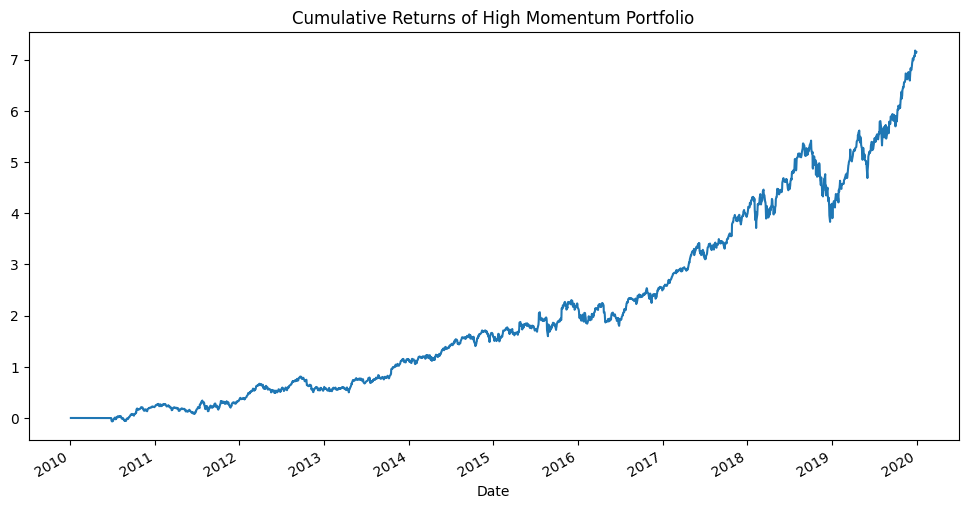

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
cumulative_returns.plot(title='Cumulative Returns of High Momentum Portfolio')
plt.show()

In [51]:
average_annual_return = portfolio_returns.mean() * 252
volatility = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = average_annual_return / volatility

In [52]:
print(f"Average Annual Return: {average_annual_return:.2%}")
print(f"Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Average Annual Return: 22.83%
Volatility: 19.00%
Sharpe Ratio: 1.20
